## Sistemas de ecuacións diferenciais de primeira orde

Considera un problema de mestura nun tanque.

![tanques_mestura](https://drive.google.com/uc?export=view&id=1IwCctMgeOKM8ziJAoQU1ZdTY0iIJRuRr)

Temos dous tanques:
- O depósito **A** contén 30 litros con 550 gramos de sal disolta
- O depósito **B** contén 20 litros con 260 gramos de sal disolta

Ademais:

- Un fluxo entra no tanque A cunha concentración de 10 g/L e un caudal de 1,5 L/min.
- Unha corrente entra no tanque B cunha concentración de 30 g/L e un caudal de 1L/min
- Hai un caudal do tanque **A** ao **B** de 3 L/min
- Hai un caudal do tanque **B** ao **A** de 1,5 L/min
- A corrente de saída está no tanque **B** cun caudal de 2,5 L/min

A súa tarefa é representar gráficamente a concentración de sal nos tanques A e B en función do tempo.

Comeza coas seguintes definicións:

In [ ]:
import numpy as np

V_A = 30 # L
V_B = 20 # L
C_A0 = 550 / V_A # g/L
C_B0 = 260 / V_B # g/L

print(f'C_A0 {C_A0:.2f} g/L')
print(f'C_B0 {C_B0:.2f} g/L')

C_A0 18.33 g/L
C_B0 13.00 g/L


Agora definamos os caudais dos tanques e vexamos o balance xeral:

In [ ]:
f_A = 1.5  # L/min
C_A = 10   # g/L

f_B = 1      # L/min
C_B = 30     # g/L

f_AB = 3     # L/min
f_BA = 1.5   # L/min

f_Bsae = 2.5 # L/min

bal_A = f_A + f_BA - f_AB
bal_B = f_B + f_AB - f_BA - f_Bsae

print(f'Balance de materia tanque A: {bal_A:.2f} L/min')
print(f'Balance de materia tanque B: {bal_B:.2f} L/min')


Balance de materia tanque A: 0.00 L/min
Balance de materia tanque B: 0.00 L/min


Logo, non temos que preocuparnos polo cambio de volume dentro de los tanques.

As ecuaciones que establecen o cambio da concentración en cada tanque, $S_A(t)$ y $S_B(t)$ representa la concentración en g/L, ó longo do tempo:

$\frac{\delta S_A}{\delta t} = \frac{1}{V_A}(f_A C_A - f_{AB} S_A(t) + f_{BA} S_B(t))$

e:

$\frac{dS_B}{dt} = \frac{1}{V_B}(f_B C_B + f_{AB} S_A(t) - f_{BA} S_B(t) - f_{Bout} S_B(t))$

In [ ]:
def dSdt(t,S):
    S_A,S_B = S
    dSAdt = ( f_A * C_A - f_AB * S[0] + f_BA * S[1] ) / V_A
    dSBdt = (f_B * C_B + f_AB * S[0] - f_BA * S[1] -f_Bsae * S[1] ) / V_B
    return np.array([dSAdt,dSBdt])

dSdt(0,[18,15])

array([-0.55,  1.2 ])

In [ ]:
from scipy.integrate import solve_ivp

S0 =(C_A0,C_B0)

t_span = (0,200) # min
t_eval = np.linspace(t_span[0],t_span[1],100)

sol = solve_ivp(dSdt,t_span,S0,t_eval = t_eval)

sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  2.020e+00 ...  1.980e+02  2.000e+02]
        y: [[ 1.833e+01  1.722e+01 ...  1.401e+01  1.400e+01]
            [ 1.300e+01  1.558e+01 ...  1.798e+01  1.799e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 134
     njev: 0
      nlu: 0

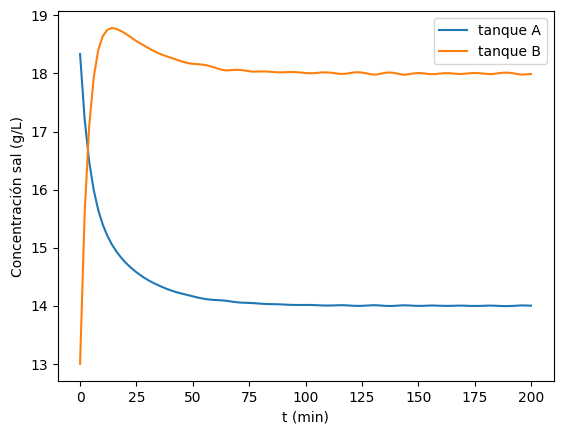

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sol.t,sol.y  [0], label='tanque A')
plt.plot(sol.t,sol.y  [1], label='tanque B')
plt.xlabel('t (min)')
plt.ylabel('Concentración sal (g/L)')
plt.legend()

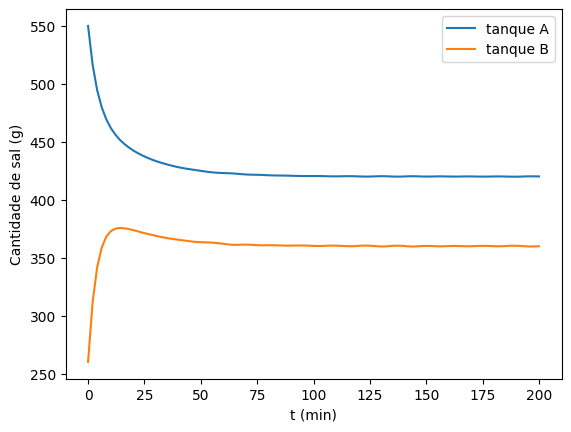

In [ ]:
plt.plot(sol.t,sol.y[0] * V_A, label='tanque A')
plt.plot(sol.t,sol.y[1] * V_B, label='tanque B')
plt.xlabel('t (min)')
plt.ylabel('Cantidade de sal (g)')
plt.legend()

## Ejercicio Reactores

NO OLVIDE DESCARGAR LAS IMÁGENES DEL ESQUEMA DE REACCIONES Y LA TABLA DE CONSTANTES
[Link a repo](https://github.com/luis-zepeda/python-ChemEng/tree/master/emptyLectures)

Sánchez, Rodríguez y Ancheyta (2005) desarrollaron un modelo de 5 lumps (ver Figura) para la hidrodesintegración de crudo Maya. La hidrodesintegración se llevó a cabo en una planta piloto con un reactor de lecho fijo, utilizando NiMo/γ-Al2O3, a una temperatura de reacción de 380-420°C, 0.33-1.5 h<sup>-1</sup> de LHSV (liquid houyrluy standard velocity), 890 m<sup>3/m3 de relación H2/aceite y 6.9MPa de presión. Los 5 lumps considerados son residuos (>538°C), gasóleo de vacío (343-538°C), destilados intermedios (204-343°C), nafta (IBP-204) y gases.


El modelo consta de cinéticas de primer orden para cada reacción de la figura e incluye 10 parámetros cinéticos los cuales están presentados en la tabla. La cinética para cada reacción individual se puede escribir como:

$r_i = k_iy_i$

Donde $r_i$ es la rapidez de reacción i-ésima en %peso/hr, $k_i$ es la constante cinética para la reacción i-ésima en h-1,(ver Tabla),  $y_j$ es el porcentaje de masa del reactivo j.

![esquema-reacciones.jpg](esquema-reacciones.jpg)

Si se opera en forma isotérmica a 400°C, una presión de 6.9 MPa, el diámetro del reactor es de 3.5 m, y con un LHSV de 1 h-1 (medido a 15.15°C), obtener la distribución de concentraciones $(y_j)$ y de conversión de residuos a lo largo de un reactor PFR. La conversión del residuo se define como:

$X_R=\frac{Flujo másico del Residuo en la alimentación - Flujo másico del Residuo}{Flujo másico del Residuo en la alimentación}$

Las ecuaciones de balance de materia pueden ser escritas como:

$\frac{d y_i}{dV} = \frac{1}{v_0} R_i$

Donde $v_0$ es el flujo volumétrico del crudo al inicio del reactor, $R_i$ es la rapidez de reacción neta del componente i en %peso/hr. Se requiere procesar 21,000 BPD de crudo con una gravedad API de 21.79 a 15.15°C, la cual se define como:

$API = \frac{141.5}{SG} - 131.5$

Donde $SG$ es la densidad relativa del crudo a 15.15°C con respecto a la del agua a 15.15°C (1.00341 g/cm3). La densidad del crudo a 400°C es de 0.715 g/cm3.

Información adicional:

![tablas.jpg](tablas.jpg)

Les ayudo definiendo la rapidez de reacción neta de cada reactivo-producto

1. Residuos:   

$R_{total}^{res} = -r_{R1} -r_{R2}-r_{R3}-r_{R4}$

2. VGO:

$R_{total}^{VGO} = r_{R1} -r_{R5}-r_{R6}-r_{R7}$

3. Destilables:

$R_{total}^{des} = r_{R2}+r_{R5}-r_{R8}-r_{R9}$

4. Naftas:

$R_{total}^{naf} = r_{R3}+r_{R6}+r_{R8}-r_{R10}$

5. Gases:

$R_{total}^{gas} = r_{R4}+r_{R7}+r_{R9}+r_{R10}$

Representar a variaciónda fracció másica dos lotes en función do volume.